# Zadaní

1. Sestavte program, který bude simulovat generátor náhodných čísel s daným rozdělením podle zadání (viz níže). Použijte metodu inverzní transformace (popřípadě vhodného algoritmu) a zamítací metodu. Vygenerujte pro každou metodu soubor čísel o dané velikosti (viz zadání níže).

1. Správnost rozdělení vygenerovaných čísel předveďte v grafech. Dále vypočtěte statistické charakteristiky:
    * střední hodnota
    * rozptyl
    * směrodatná odchylka
    * medián
    * 25% kvantil
    * 75% kvantil

__Zadání č. 2:__ Rozdělení NORMÁLNÍ, počet hodnot = __360__, parametry: střední hodnota = __0.0__, rozptyl = __5.0__

In [1]:
import random
import math
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum

# Trida obsahujíci implementaci generatur nahodnych cisel normalniho rozdeleni

In [2]:
class MethodType(Enum):
    """
    Typ metody generujici nahodne cisla
    """
    REJECTION = 1
    CENTRAL_LIMIT_THEOREM = 2

class NormRandom:
    """
    Trida zajistujici nahodne generovani cisel z normalniho rozdeleni
    """
    
    def __init__(self, mean: float, variance: float):
        """
        Vytvori generator nahodnych cisel normalniho rozdeleni s definovanymi parametry
        
        Parametry:
            mean - Stredni hodnota
            variance - Rozptyl
        """
        self.mean = mean
        self.variance = variance
        self.methodes = {
            MethodType.REJECTION: self.__generate_rejection,
            MethodType.CENTRAL_LIMIT_THEOREM: self.__generate_central_limit_theorem     
        }
        self.updateInterval()

    def updateInterval(self):
        self.std = math.sqrt(self.variance)
        self.A, self.B = -self.std * 3, self.std * 3
        self.C = 1.0 / (self.std * math.sqrt(2 * math.pi))
        print(f"Interval is <{self.A}; {self.B}>")
        print(f"Max value is {self.C}")
    
    def generateRandom(self, type: MethodType) -> float:
        """
        Vygeneruje nahodne cislo z tohoto rozdeleni s vyuzitim specifikovane metody
        
        Parametry:
            type - Typ metody, ktera bude vyuzivat pro generovani nahodneho cisla z tohoto rozdeleni
        """
        return self.methodes[type]()

    def __generate_central_limit_theorem(self) -> float:
        """
        Vygeneruje nahodne cislo z normalniho rozdeleni pomoci algoritmu odvozeneho od 
        Lindenbergovy-Lénovyho centralni limitni vety
        """
        S = 0
        i = 1
        while i <= 12:
            r = random.random()    
            S += r 
            i += 1
        return (S - 6) * self.std + self.mean

    def __generate_rejection(self) -> float:
        """
        Vygeneruje nahodne cislo pomoci zamitaci metody
        """
        while True:
            # generovani nahodnych cisel r1 a r2
            r1, r2 = random.random(), random.random()
            # x, y jsou rovnomerne rozdeleni z intervalu X ∈ <A; B> a Y ∈ <0; C>
            x = self.A + (self.B - self.A) * r1
            y = self.C * r2
            # y <= f(x) pak x je generovana hodnota a navrati ji
            if y <= norm.pdf(x, loc=self.mean, scale=self.std):
                return x 

# Utility

In [3]:

def plot_histogram(values: list, title: str, bins: int = 30):
    """
    Vykresli histogram hodnot generovanych nahodnym generatorem cisel

    Parametry:
        values - Hodnoty generovane nahodnym generatorem cisel
        title - nazev grafu
        bins - pocet casti na kolik bude histogram rozdelen
    """
    plt.figure(figsize=(15, 10))
    plt.hist(values, bins=bins, density=True, alpha=0.6, color='b')
    plt.title(title)
    plt.xlabel('Hodnota')
    plt.ylabel('Relativní četnost')
    plt.show()

def print_statistics(data: list):
    # stredni hodnota
    mean_value = np.mean(data)
    # rozptyl
    variance_value = np.var(data)
    # streadni hodnota
    std_deviation = np.std(data)
    # median (kvantil 50%)
    median_value = np.median(data)
    # kvantil 25%
    quantile_25 = np.percentile(data, 25)
    # kvantil 75%
    quantile_75 = np.percentile(data, 75)

    print("Statistické charakteristiky:")
    print(f"Střední hodnota: {mean_value:.4f}")
    print(f"Rozptyl: {variance_value:.4f}")
    print(f"Směrodatná odchylka: {std_deviation:.4f}")
    print(f"Medián: {median_value:.4f}")
    print(f"25% kvantil: {quantile_25:.4f}")
    print(f"75% kvantil: {quantile_75:.4f}")

# Nastaveni

In [4]:
# Parametry normálního rozdělení
mean_value = 0
variance_value = 5
sample_size = 360

In [5]:
rndGenerator = NormRandom(mean=mean_value, variance=variance_value)

Interval is <-6.708203932499369; 6.708203932499369>
Max value is 0.17841241161527713


# Provedeni vypoctu

In [25]:
result_clt = [rndGenerator.generateRandom(type=MethodType.CENTRAL_LIMIT_THEOREM) for _ in range(sample_size)]
print(f"Value count for CTL: {len(result_clt)}")

result_rejection = [rndGenerator.generateRandom(type=MethodType.REJECTION) for _ in range(sample_size)]
print(f"Value count for Rejection: {len(result_rejection)}")

Value count for CTL: 360
Value count for Rejection: 360


# Zamítací metoda

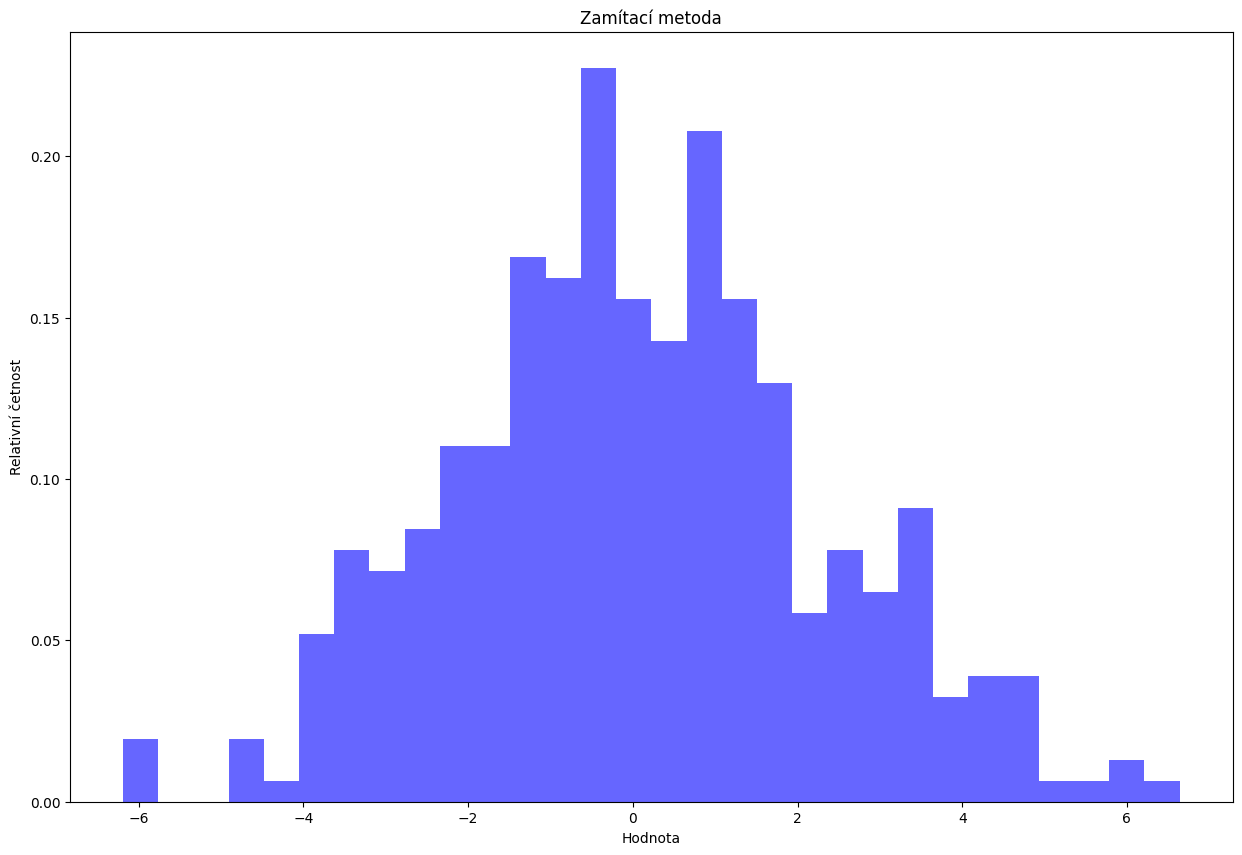

Statistické charakteristiky:
Střední hodnota: 0.0763
Rozptyl: 4.9980
Směrodatná odchylka: 2.2356
Medián: -0.0570
25% kvantil: -1.3954
75% kvantil: 1.4220


In [17]:
plot_histogram(result_rejection, 'Zamítací metoda')
print_statistics(result_rejection)

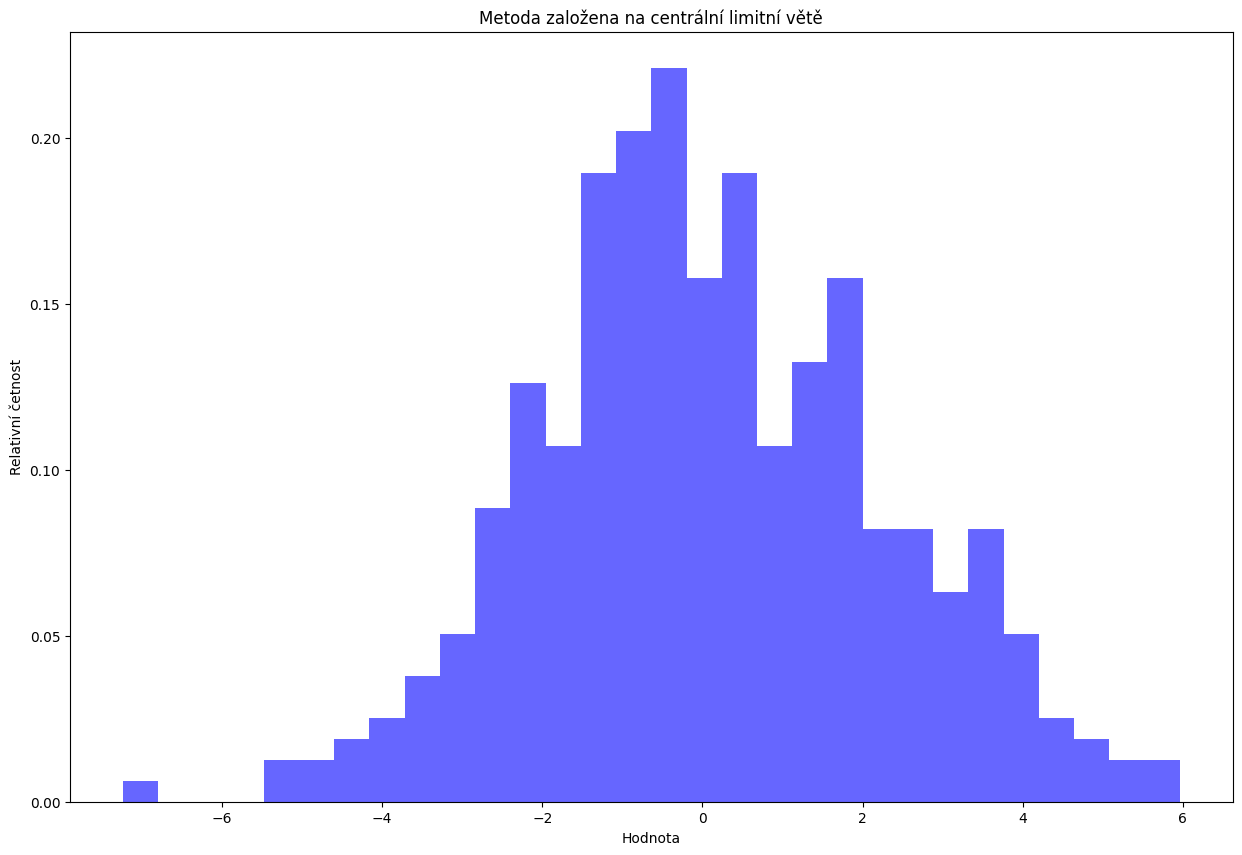

Statistické charakteristiky:
Střední hodnota: 0.1090
Rozptyl: 4.7186
Směrodatná odchylka: 2.1722
Medián: -0.0831
25% kvantil: -1.3025
75% kvantil: 1.6212


In [26]:
plot_histogram(result_clt, 'Metoda založena na centrální limitní větě')
print_statistics(result_clt)

# Test pro overeni pro vice vzorku

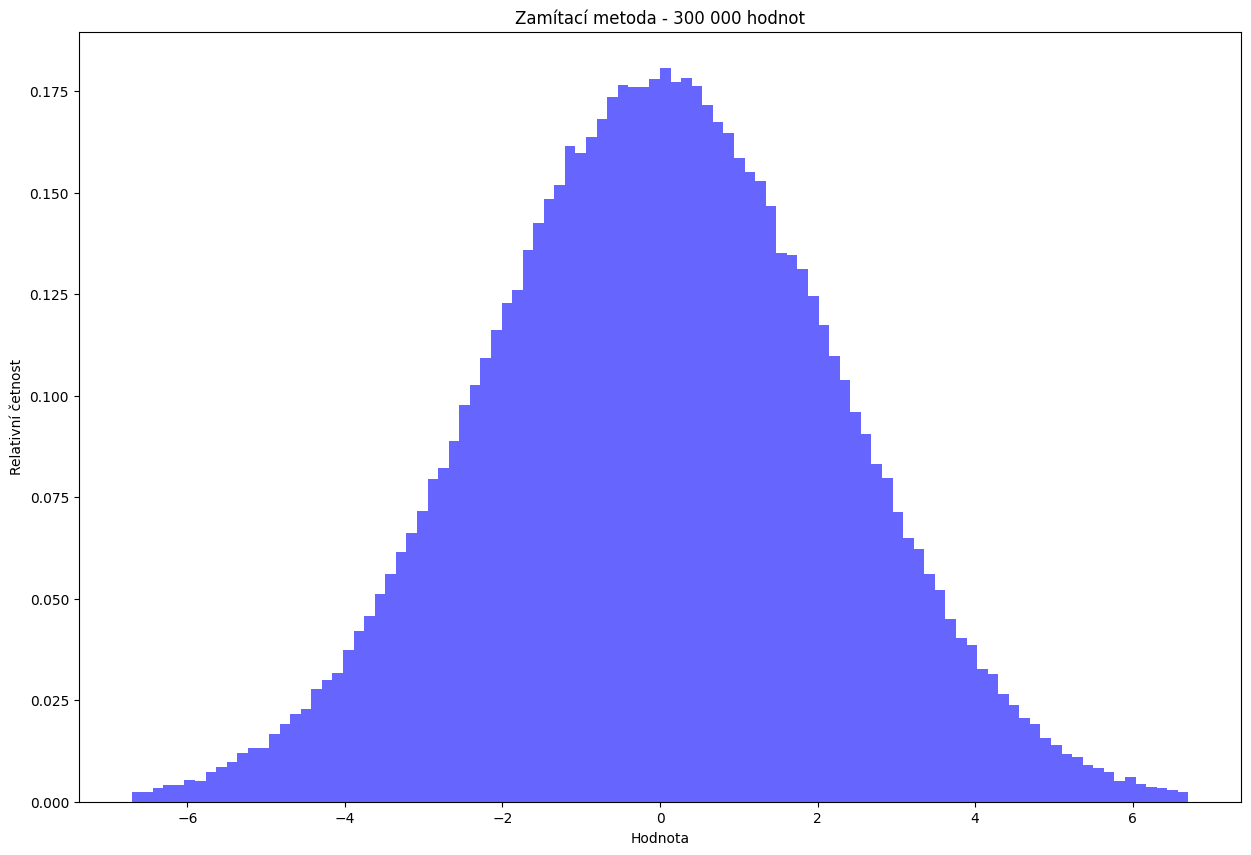

Statistické charakteristiky:
Střední hodnota: -0.0016
Rozptyl: 4.8876
Směrodatná odchylka: 2.2108
Medián: -0.0018
25% kvantil: -1.5045
75% kvantil: 1.5062


In [9]:
res_large = [rndGenerator.generateRandom(type=MethodType.REJECTION) for _ in range(300000)]
plot_histogram(res_large, 'Zamítací metoda - 300 000 hodnot', bins=100)
print_statistics(res_large)

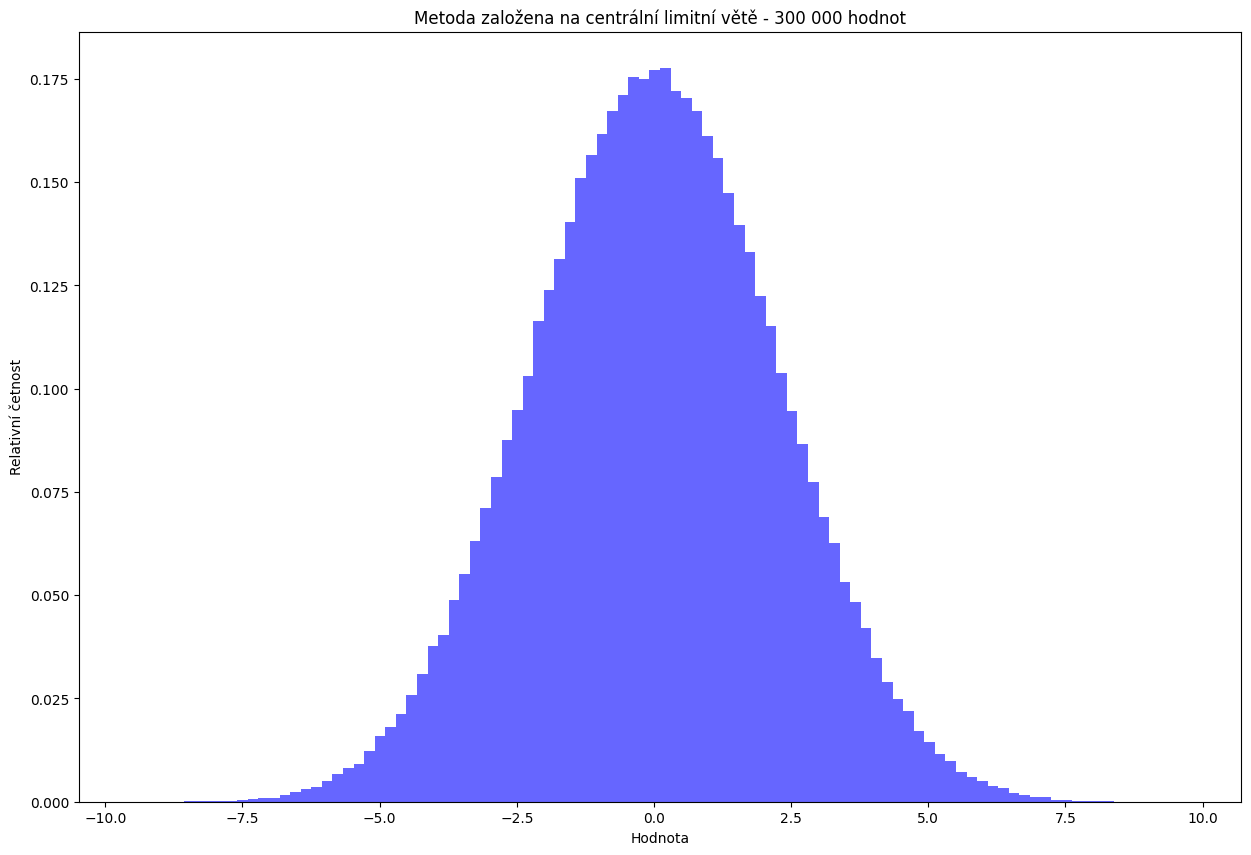

Statistické charakteristiky:
Střední hodnota: 0.0013
Rozptyl: 4.9944
Směrodatná odchylka: 2.2348
Medián: 0.0016
25% kvantil: -1.5140
75% kvantil: 1.5219


In [10]:
res_large = [rndGenerator.generateRandom(type=MethodType.CENTRAL_LIMIT_THEOREM) for _ in range(300000)]
plot_histogram(res_large, 'Metoda založena na centrální limitní větě - 300 000 hodnot', bins=100)
print_statistics(res_large)